In [3]:
# IMDB 데이터셋 로드

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 자주 나타나는 단어 1만개만 사용

In [4]:
train_data[0] # train_data의 0번째 인덱스 확인

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0] # train_labels의 0번째 인덱스 확인: 1이 출력되었으므로 해당 리뷰는 긍정

1

In [6]:
max([max(sequence) for sequence in train_data]) # 가장 자주 등장하는 1만개의 단어로 제한했기에 단어 인덱스는 9,999를 넘지 않음

9999

In [7]:
# 원래의 영어 단어로 변경해보기

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 리뷰 디코딩
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 빼줌
# 사전에 없는 단어는 ?로 처리함

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
# 데이터 준비
# 정수 시퀀스를 이진 행렬로 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [11]:
# 모델 정의

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# 모델 컴파일

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# 옵티마이저 설정

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 손실과 측정을 함수 객체로 지정

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [14]:
# 훈련 검증
# 검증 세트 준비

x_val = x_train[:10000]
partial_x_train = x_train[10000:] # 25,000개에서 10,000개를 떼어 15,000개의 훈련 검증 세트 제작
y_val = y_train[:10000]
partial_y_train = y_train[10000:] # 25,000개에서 10,000개를 떼어 15,000개의 훈련 검증 세트 제작

In [15]:
# 모델 훈련

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,   # history 객체: 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성 가지고 있음
                    partial_y_train,
                    epochs=20,         # 20번 반복
                    batch_size=512,    # 랜덤한 512개씩 선정
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.5239 - accuracy: 0.7821 - val_loss: 0.4103 - val_accuracy: 0.8510
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.3152 - accuracy: 0.9010 - val_loss: 0.3291 - val_accuracy: 0.8739
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2307 - accuracy: 0.9280 - val_loss: 0.3074 - val_accuracy: 0.8755
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1831 - accuracy: 0.9413 - val_loss: 0.2739 - val_accuracy: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1485 - accuracy: 0.9528 - val_loss: 0.2820 - val_accuracy: 0.8885
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1228 - accuracy: 0.9612 - val_loss: 0.2869 - val_accuracy: 0.8866
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [16]:
history_dict = history.history

In [17]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

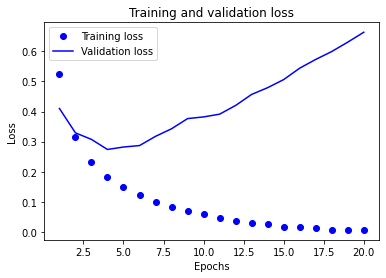

In [18]:
# 훈련과 검증 손실(loss) 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') # bo: 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b: 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

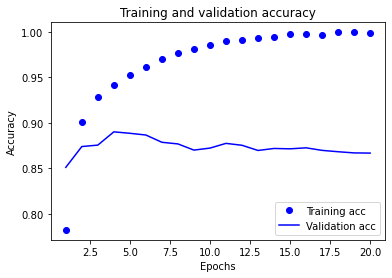

In [20]:
# 훈련과 검증 정확도(accuracy) 그리기

plt.clf() # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
# 모델 처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) # epoch를 4로 줄임

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.4938 - accuracy: 0.7941
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.2754 - accuracy: 0.9085
Epoch 3/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2097 - accuracy: 0.9270
Epoch 4/4
25000/25000 [==============================] - 3s 135us/step


In [22]:
# 훈련된 모델로 새로운 데이터에 대해 예측

model.predict(x_test)

array([[0.1731599 ],
       [0.9970788 ],
       [0.8335266 ],
       ...,
       [0.16215259],
       [0.0823496 ],
       [0.67877716]], dtype=float32)